In [1]:
import pandas as pd
import os
import numpy

C:\Users\kisho\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [21]:
cust=pd.read_csv('Customers.csv')
prd=pd.read_csv('Products.csv')
trns=pd.read_csv('Transactions.csv')

## EDA

In [22]:
cust.head(5)

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [23]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [24]:
cust['SignupDate'] = pd.to_datetime(cust['SignupDate'])

In [25]:
cust.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [26]:
cust[cust.duplicated()]

,CustomerID,CustomerName,Region,SignupDate


In [27]:
cust.describe()

,SignupDate
count,200
mean,2023-07-19 08:31:12
min,2022-01-22 00:00:00
25%,2022-09-26 12:00:00
50%,2023-08-31 12:00:00
75%,2024-04-12 12:00:00
max,2024-12-28 00:00:00


In [49]:
cust.describe(include=["object"])

,CustomerID,CustomerName,Region
count,200,200,200
unique,200,200,4
top,C0001,Lawrence Carroll,South America
freq,1,1,59


In [28]:
prd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [29]:
prd.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [30]:
prd.describe(include=["object"])

,ProductID,ProductName,Category
count,100,100,100
unique,100,66,4
top,P001,ActiveWear Smartwatch,Books
freq,1,4,26


In [31]:
prd.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [32]:
prd[prd.duplicated()]

,ProductID,ProductName,Category,Price


In [33]:
trns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [34]:
trns.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [50]:
trns.describe(include=["object"])

,TransactionID,CustomerID,ProductID
count,1000,1000,1000
unique,1000,199,100
top,T00001,C0109,P059
freq,1,11,19


In [35]:
trns['TransactionDate'] = pd.to_datetime(trns['TransactionDate'])

In [36]:
trns.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [37]:
trns[trns.duplicated()]

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

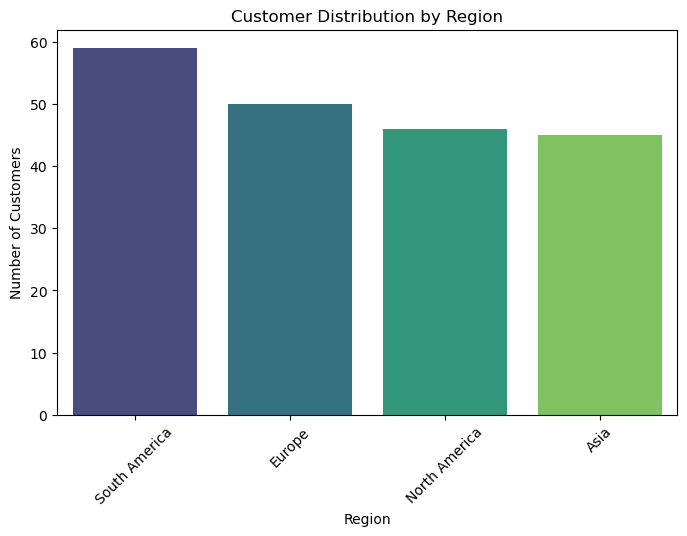

In [39]:
region_counts = cust['Region'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

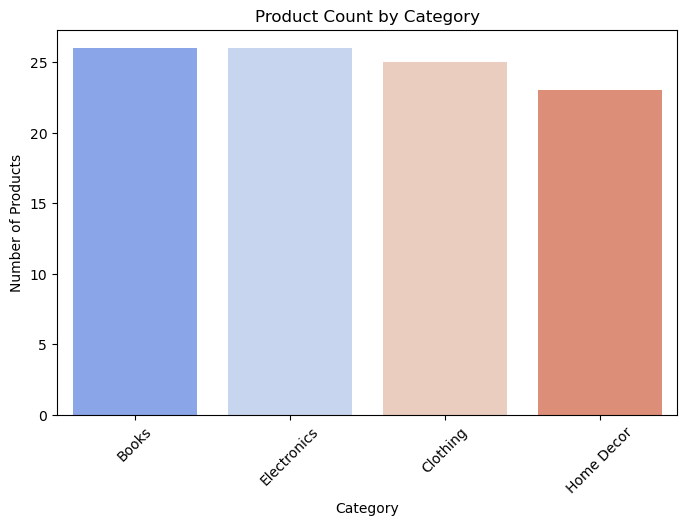

In [40]:
category_counts = prd['Category'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="coolwarm")
plt.title('Product Count by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

C:\Users\kisho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


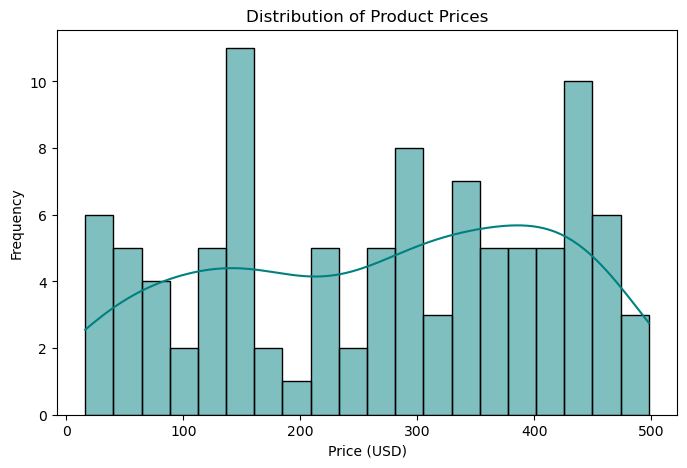

In [41]:
plt.figure(figsize=(8, 5))
sns.histplot(prd['Price'], bins=20, kde=True, color="teal")
plt.title('Distribution of Product Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

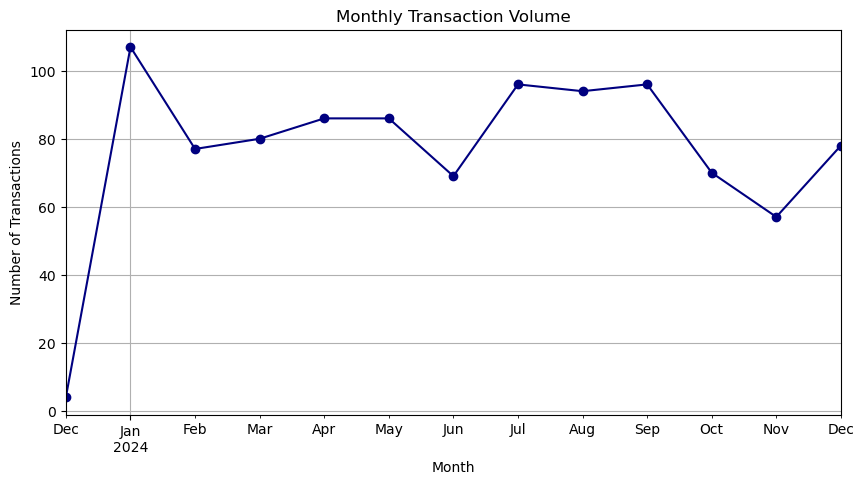

In [43]:
trns['Month'] = trns['TransactionDate'].dt.to_period('M')
monthly_transactions = trns.groupby('Month').size()
plt.figure(figsize=(10, 5))
monthly_transactions.plot(kind='line', marker='o', color='navy')
plt.title('Monthly Transaction Volume')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

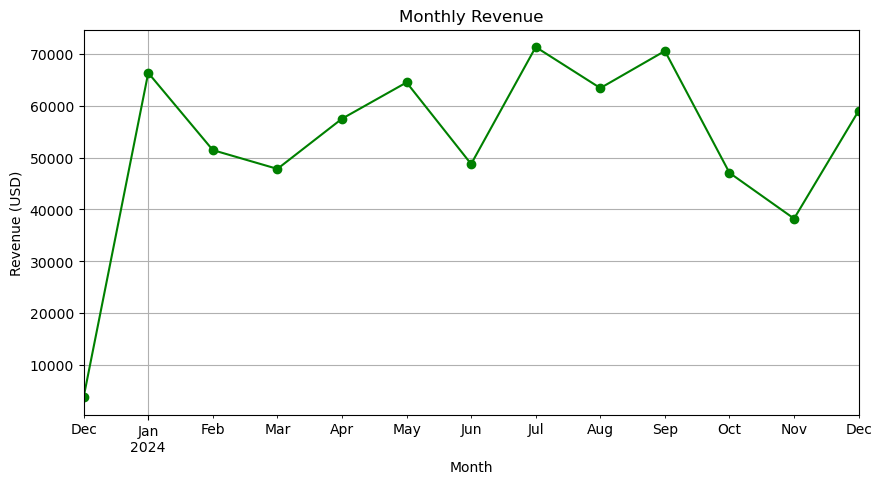

In [44]:
monthly_revenue = trns.groupby('Month')['TotalValue'].sum()
plt.figure(figsize=(10, 5))
monthly_revenue.plot(kind='line', marker='o', color='green')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue (USD)')
plt.grid(True)
plt.show()

In [45]:
# Create a transaction list where each customer has a list of products purchased
transactions = merged_data.groupby('CustomerID')['ProductName'].apply(list)

# Find frequent pairs of products
from itertools import combinations
from collections import Counter

# Generate product pairs from each transaction
product_pairs = transactions.apply(lambda x: list(combinations(x, 2)))
all_pairs = [pair for sublist in product_pairs for pair in sublist]

# Count occurrences of each pair
pair_counts = Counter(all_pairs)
print(pair_counts.most_common(10))  


[(('BookWorld Biography', 'TechPro T-Shirt'), 9), (('SoundWave Cookbook', 'ActiveWear Running Shoes'), 9), (('SoundWave Cookbook', 'ActiveWear Smartwatch'), 8), (('HomeSense T-Shirt', 'ActiveWear Smartwatch'), 7), (('ActiveWear Textbook', 'ActiveWear Smartwatch'), 7), (('ActiveWear Wall Art', 'SoundWave Headphones'), 7), (('BookWorld Biography', 'ActiveWear Jacket'), 7), (('SoundWave Cookbook', 'ActiveWear Textbook'), 7), (('HomeSense Novel', 'ActiveWear Smartwatch'), 7), (('TechPro Vase', 'ActiveWear Smartwatch'), 6)]


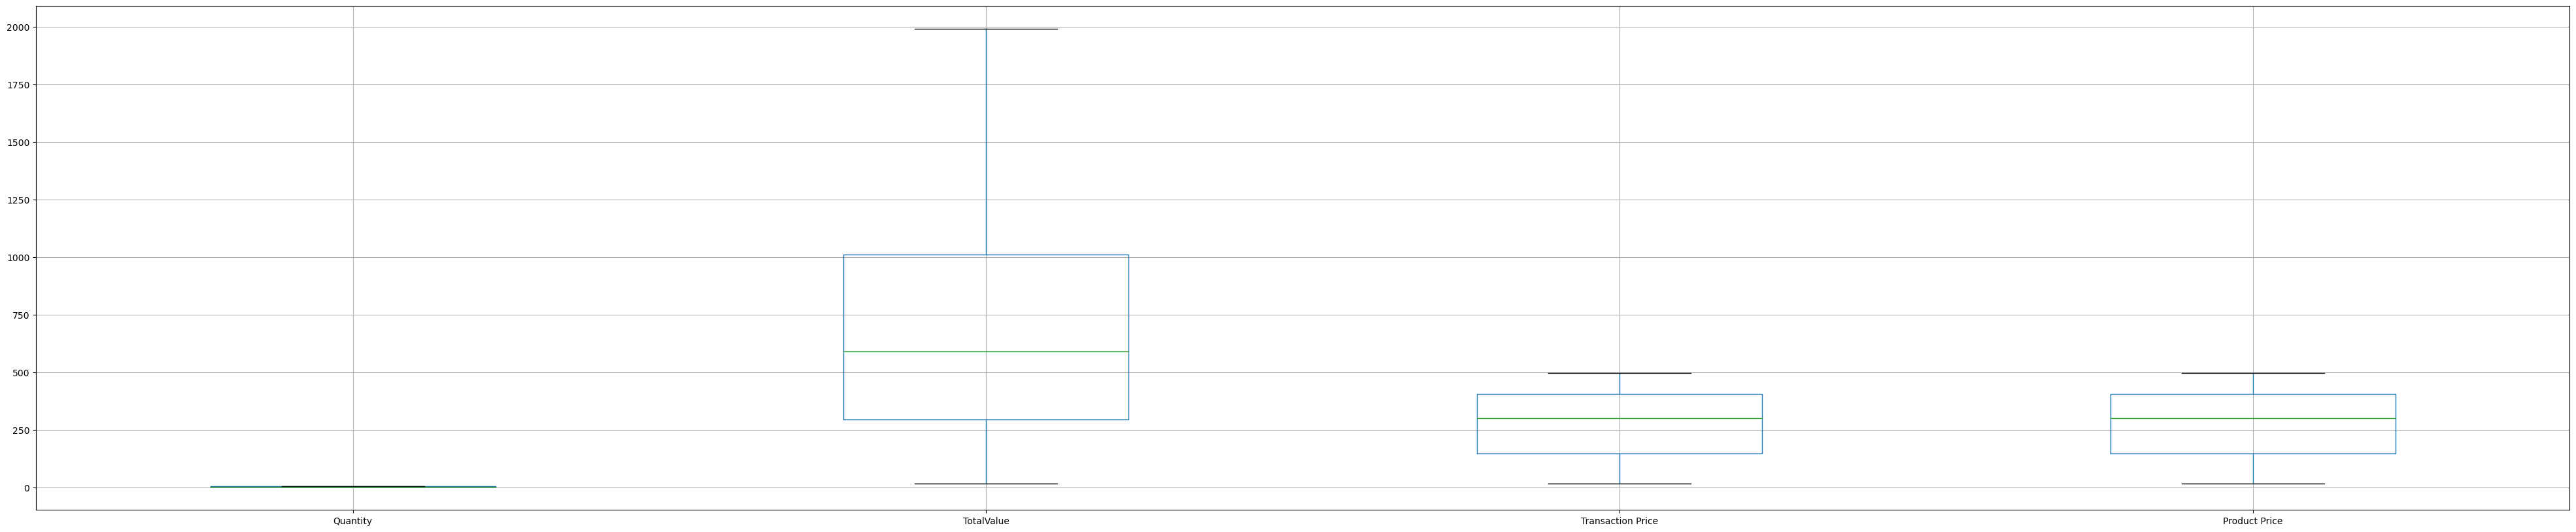

In [46]:
#Checking for outliers
merged_data.boxplot(figsize= [50,10])
plt.show()

In [47]:
numeric_cols = merged_data.select_dtypes(include='number')
correlation_matrix = numeric_cols.corr()

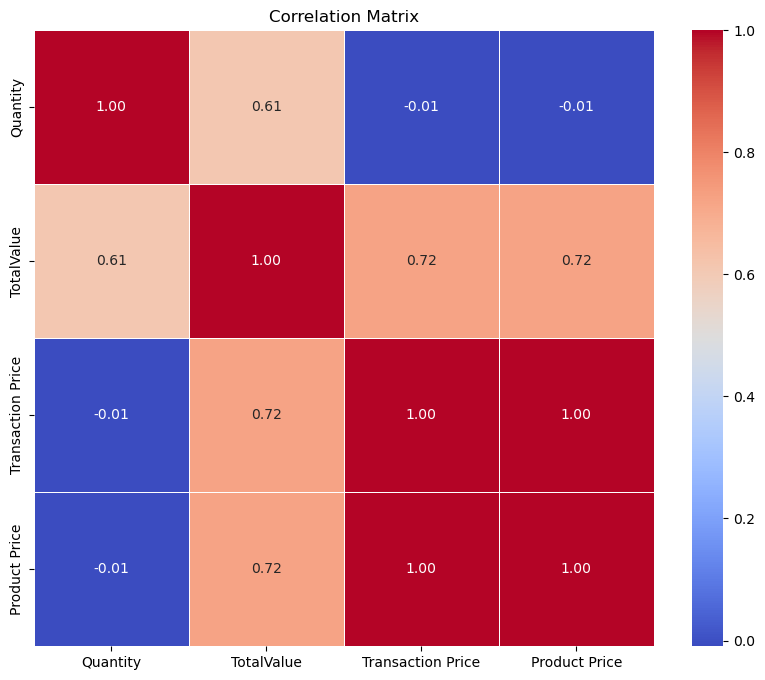

In [48]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()